In [3]:
!pip install tensorflow

Using legacy 'setup.py install' for termcolor, since package 'wheel' is not installed.
Using legacy 'setup.py install' for wrapt, since package 'wheel' is not installed.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
    Running setup.py install for wrapt: started
    Running setup.py install for wrapt: finished with status 'done'
    Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'


You should consider upgrading via the 'c:\users\hp-pc\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.5.0'

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [4]:
#training
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                vertical_flip=True,
                                horizontal_flip=True
                                )

In [5]:
training_set=train_datagen.flow_from_directory(r'C:\Users\HP-PC\Desktop\Monkey breed classification\training\training',
                                              target_size=(224,224),class_mode='categorical',batch_size=16)

Found 1098 images belonging to 10 classes.


In [6]:
#testing #shift+l
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory(r'C:\Users\HP-PC\Desktop\Monkey breed classification\validation\validation',
                                         target_size=(224,224),class_mode='categorical',batch_size=16)

Found 272 images belonging to 10 classes.


# CNN

In [7]:
#initializing the cnn
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu',input_shape=[224,224,3]))
# max pooling -> feature extraction
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

# TRAINING

In [18]:
#from keras.callbacks import EarlyStopping
#early_stopping_monitor = EarlyStopping(patience=2)

In [9]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
graph1=cnn.fit(x=training_set,validation_data=test_set,epochs=20)

Epoch 1/20
69/69 [==============================] - 69s 997ms/step - loss: 2.2910 - accuracy: 0.2477 - val_loss: 1.7534 - val_accuracy: 0.3346
Epoch 2/20
69/69 [==============================] - 71s 1s/step - loss: 1.6361 - accuracy: 0.4271 - val_loss: 1.6242 - val_accuracy: 0.4118
Epoch 3/20
69/69 [==============================] - 72s 1s/step - loss: 1.4768 - accuracy: 0.4845 - val_loss: 1.4637 - val_accuracy: 0.4669
Epoch 4/20
69/69 [==============================] - 84s 1s/step - loss: 1.3307 - accuracy: 0.5246 - val_loss: 1.3732 - val_accuracy: 0.4669
Epoch 5/20
69/69 [==============================] - 78s 1s/step - loss: 1.2982 - accuracy: 0.5401 - val_loss: 1.4995 - val_accuracy: 0.4743
Epoch 6/20
69/69 [==============================] - 78s 1s/step - loss: 1.2682 - accuracy: 0.5601 - val_loss: 1.4307 - val_accuracy: 0.5074
Epoch 7/20
69/69 [==============================] - 94s 1s/step - loss: 1.1168 - accuracy: 0.6029 - val_loss: 1.2670 - val_accuracy: 0.5257
Epoch 8/20
69/69 

In [10]:
graph1.model.save(r'C:\Users\HP-PC\Desktop\Monkey breed classification\models\model-20.h5')

In [39]:
model=tf.keras.models.load_model(r'C:\Users\HP-PC\Desktop\Monkey breed classification\models\model-20.h5')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

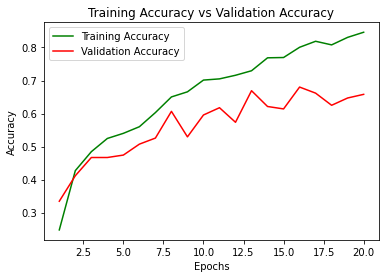

In [13]:
import matplotlib.pyplot as plt
acc_train=graph1.history['accuracy']
acc_val=graph1.history['val_accuracy']
epochs=range(1,21)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'r',label='Validation Accuracy')
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

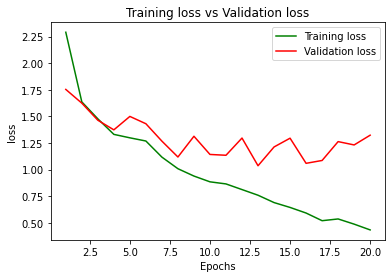

In [15]:
import matplotlib.pyplot as plt
loss_train=graph1.history['loss']
loss_val=graph1.history['val_loss']
epochs=range(1,21)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'r',label='Validation loss')
plt.title("Training loss vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# TESTING

In [47]:
import numpy as np
import os
from PIL import Image
from tensorflow.keras.preprocessing import image
import pandas as pd

In [54]:
classes=os.listdir(r'C:\Users\HP-PC\Desktop\Monkey breed classification\training\training')

In [55]:
classes

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [49]:
name=pd.read_csv(r'C:\Users\HP-PC\Desktop\Monkey breed classification\monkey_labels.txt')
name

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


[[2.1251122e-08 3.6111669e-05 2.1917137e-06 1.0434111e-06 7.5416517e-01
  4.9851877e-07 3.9458617e-05 1.5940366e-05 2.4573952e-01 1.2003788e-07]]
4
Label                                                        n4   
  Latin Name                                cebuella_pygmea\t     
 Common Name                        pygmy_marmoset                
 Train Images                                                  131
 Validation Images                                              26
Name: 4, dtype: object
 pygmy_marmoset                


<function matplotlib.pyplot.show(close=None, block=None)>

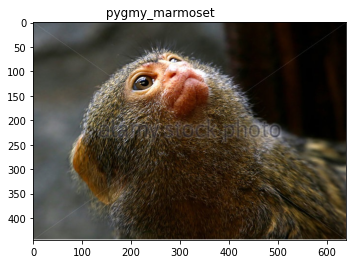

In [65]:
test_image=r'C:\Users\HP-PC\Desktop\Monkey breed classification\validation\validation\n4\n400.jpg'
save_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)
result=np.argmax(result)
print(result)
classname=name.iloc[result]
print(classname)
classname=classname.iloc[2]
print(classname)
plt.imshow(save_image)
plt.title(classname)
plt.show